In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
pd.set_option('display.max_rows', None)  # Para mostrar todas as linhas se necessário
pd.set_option('display.max_columns', None)  # Para mostrar todas as colunas
pd.set_option('display.max_colwidth', None)  # Para mostrar todo o conteúdo de cada célula sem truncar


In [28]:
df = pd.read_csv("/Users/bolsolui/Documents/personal/MECAI/git/rais_dados/feature_selection/df_dummies.csv")
df.head()

,faixa_remuneracao_media_sm,sexo,Produção de lavouras temporárias,Horticultura e floricultura,Produção de lavouras permanentes,Produção de sementes e mudas certificadas,Pecuária,Atividades de apoio à agricultura e à pecuária,Caça e serviços relacionados,Produção florestal - florestas plantadas,Produção florestal - florestas nativas,Atividades de apoio à produção florestal,Pesca,Aqüicultura,Extração de carvão mineral,Extração de petróleo e gás natural,Extração de minério de ferro,Extração de minerais metálicos não-ferrosos,"Extração de pedra, areia e argila",Extração de outros minerais não-metálicos,Atividades de apoio à extração de petróleo e gás natural,"Atividades de apoio à extração de minerais, exceto petróleo e gás natural",Abate e fabricação de produtos de carne,Preservação do pescado e fabricação de produtos do pescado,"Fabricação de conservas de frutas, legumes e outros vegetais",Fabricação de óleos e gorduras vegetais e animais,Laticínios,"Moagem, fabricação de produtos amiláceos e de alimentos para animais",Fabricação e refino de açúcar,Torrefação e moagem de café,Fabricação de outros produtos alimentícios,Fabricação de bebidas alcoólicas,Fabricação de bebidas não-alcoólicas,Processamento industrial do fumo,Fabricação de produtos do fumo,Preparação e fiação de fibras têxteis,"Tecelagem, exceto malha",Fabricação de tecidos de malha,"Acabamentos em fios, tecidos e artefatos têxteis","Fabricação de artefatos têxteis, exceto vestuário",Confecção de artigos do vestuário e acessórios,Fabricação de artigos de malharia e tricotagem,Curtimento e outras preparações de couro,Fabricação de artigos para viagem e de artefatos diversos de couro,Fabricação de calçados,"Fabricação de partes para calçados, de qualquer material",Desdobramento de madeira,"Fabricação de produtos de madeira, cortiça e material trançado, exceto móveis",Fabricação de celulose e outras pastas para a fabricação de papel,"Fabricação de papel, cartolina e papel-cartão","Fabricação de embalagens de papel, cartolina, papel-cartão e papelão ondulado","Fabricação de produtos diversos de papel, cartolina, papel-cartão e papelão ondulado",Atividade de impressão,Serviços de pré-impressão e acabamentos gráficos,Reprodução de materiais gravados em qualquer suporte,Coquerias,Fabricação de produtos derivados do petróleo,Fabricação de biocombustíveis,Fabricação de produtos químicos inorgânicos,Fabricação de produtos químicos orgânicos,Fabricação de resinas e elastômeros,Fabricação de fibras artificiais e sintéticas,Fabricação de defensivos agrícolas e desinfestantes domissanitários,"Fabricação de sabões, detergentes, produtos de limpeza, cosméticos, produtos de perfumaria e de higiene pessoal","Fabricação de tintas, vernizes, esmaltes, lacas e produtos afins",Fabricação de produtos e preparados químicos diversos,Fabricação de produtos farmoquímicos,Fabricação de produtos farmacêuticos,Fabricação de produtos de borracha,Fabricação de produtos de material plástico,Fabricação de vidro e de produtos do vidro,Fabricação de cimento,"Fabricação de artefatos de concreto, cimento, fibrocimento, gesso e materiais semelhantes",Fabricação de produtos cerâmicos,Aparelhamento de pedras e fabricação de outros produtos de minerais não-metálicos,Produção de ferro-gusa e de ferroligas,Siderurgia,"Produção de tubos de aço, exceto tubos sem costura",Metalurgia dos metais não-ferrosos,Fundição,Fabricação de estruturas metálicas e obras de caldeiraria pesada,"Fabricação de tanques, reservatórios metálicos e caldeiras","Forjaria, estamparia, metalurgia do pó e serviços de tratamento de metais","Fabricação de artigos de cutelaria, de serralheria e ferramentas","Fabricação de equipamento bélico pesado, armas de fogo e munições",Fabricação de produtos de metal não especificados anteriormente,Fabricação de componentes eletrônicos,Fabricação de equipamentos de informática e periféricos,Fabricação de equipamentos de comunicação,"Fabricação de aparelhos de recepção, reprodução, gravação e amplificação 

In [20]:
# Codificando a variável 'sexo' como numérica (0 para F e 1 para M)
df['sexo_cod'] = df['sexo'].map({'F': 0, 'M': 1})


In [4]:

# Selecionando a variável dependente (Y) e independente (X)
X = df.drop('faixa_remuneracao_media_sm', axis=1)
y = df['faixa_remuneracao_media_sm']


# Dividindo o conjunto de dados em treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se precisar de um conjunto de validação, divida novamente os dados de treinamento (aqui, 75% treinamento, 25% validação)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


0    0
1    1
2    0
3    1
4    0
Name: sexo_cod, dtype: int64

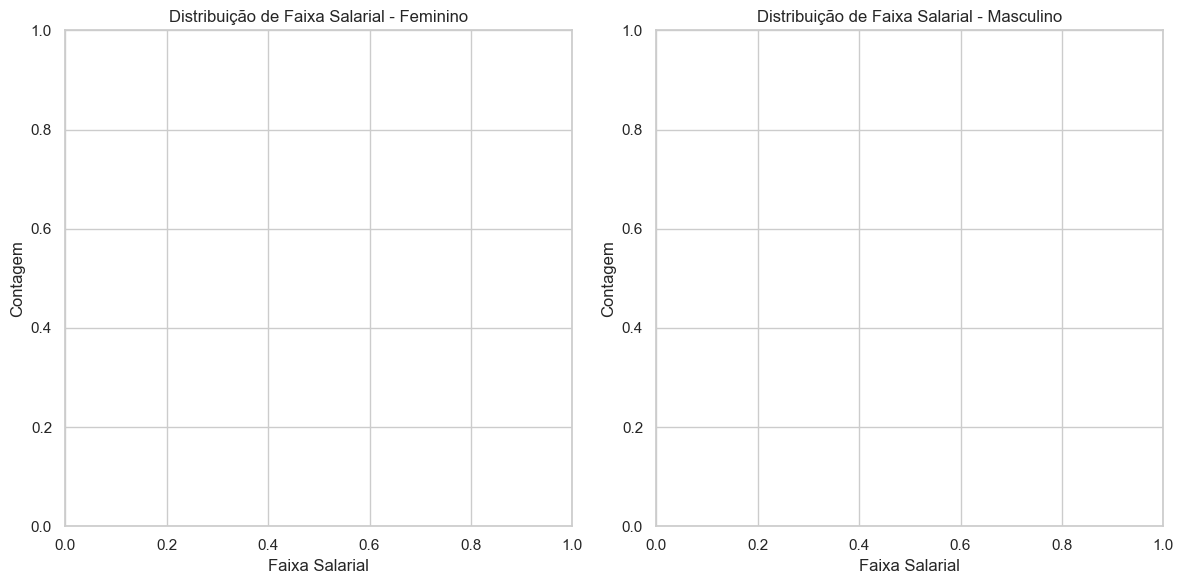

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Criando os gráficos para cada sexo
plt.figure(figsize=(12, 6))

# Gráfico para o sexo Feminino (F)
plt.subplot(1, 2, 1)
sns.countplot(x='faixa_remuneracao_media_sm', data=df[df['sexo'] == 0], palette='cool')
plt.title('Distribuição de Faixa Salarial - Feminino')
plt.xlabel('Faixa Salarial')
plt.ylabel('Contagem')

# Gráfico para o sexo Masculino (M)
plt.subplot(1, 2, 2)
sns.countplot(x='faixa_remuneracao_media_sm', data=df[df['sexo'] == 1], palette='autumn')
plt.title('Distribuição de Faixa Salarial - Masculino')
plt.xlabel('Faixa Salarial')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()
